In [1]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.
from pathlib import Path
import glob
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import random
import pickle
import os
import config
import data
import random
from natsort import natsorted
import lfp
import importlib
arm = 'UR5'

print('Using local setup')
WORKING_PATH = Path().absolute().parent
print(f'Working path: {WORKING_PATH}')
os.chdir(WORKING_PATH)
STORAGE_PATH = WORKING_PATH
print(f'Storage path: {STORAGE_PATH}')
np.set_printoptions(suppress=True)

Using local setup
Working path: /catkin_ws/src/robotics/learning_from_play
Storage path: /catkin_ws/src/robotics/learning_from_play


In [2]:
synonyms = [
     ['push', 'depress', 'hit', 'press', 'prod', 'tap'],
    ['switch', 'button'],
    ['prism', 'rectangle', 'block'],
    ['grab', 'grasp', 'seize'],
    ['pick the block'],
    ['cupboard', 'cabinet'],
    ['place', 'put'],
    ['pull', 'drag']
]

def subout(label):
    string = label.numpy().decode()
    for replacements in synonyms:
        for word in replacements:
            if word in string:
                replacement = random.choice(replacements)
                string = string.replace(word, replacement)
    return string
    
    

def augment(t, serialise):
    t['tag'] = t['tags']
    t['label'] = subout(t['labels'])
    print(t['label'])
    t['label_embedding'] = embed([t['label']])
    return serialise(t)

In [5]:
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)


embed = hub.KerasLayer(str(STORAGE_PATH)+'/saved_models/universal_sentence_encoder')

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [3]:
DATA_PATH = [STORAGE_PATH/'data'/'diverse']

In [4]:
from lfp.data import read_traj_tfrecord, serialise_traj
from tqdm import tqdm
    
    
labelled_dl = lfp.data.labelled_dl(batch_size=1, include_images = True)
label_it = iter(labelled_dl.extract(DATA_PATH))


In [6]:
label_it.next()

{'obs': <tf.Tensor: shape=(50, 36), dtype=float32, numpy=
 array([[-0.22701743,  0.2158939 ,  0.4620974 , ..., -0.6660002 ,
          0.05699992,  0.3850001 ],
        [-0.22873548,  0.21113469,  0.45797992, ..., -0.6660002 ,
          0.05699992,  0.3850001 ],
        [-0.23518252,  0.20215148,  0.44681323, ..., -0.6660002 ,
          0.05699992,  0.3850001 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]], dtype=float32)>,
 'acts': <tf.Tensor: shape=(50, 7), dtype=float32, numpy=
 array([[-0.245828  ,  0.20581369,  0.43973675,  0.5595147 , -0.50014806,
         -0.11022716,  0.06961742],
        [-0.25507322,  0.20363854,  0.43113297,  0.56440204, -0.46476036,
         -0.1204566 ,  0.        ],
        [-0.25507322,

In [7]:
iter(labelled_dl.extract(DATA_PATH).repeat()).next()

{'obs': <tf.Tensor: shape=(50, 36), dtype=float32, numpy=
 array([[-0.22701743,  0.2158939 ,  0.4620974 , ..., -0.6660002 ,
          0.05699992,  0.3850001 ],
        [-0.22873548,  0.21113469,  0.45797992, ..., -0.6660002 ,
          0.05699992,  0.3850001 ],
        [-0.23518252,  0.20215148,  0.44681323, ..., -0.6660002 ,
          0.05699992,  0.3850001 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]], dtype=float32)>,
 'acts': <tf.Tensor: shape=(50, 7), dtype=float32, numpy=
 array([[-0.245828  ,  0.20581369,  0.43973675,  0.5595147 , -0.50014806,
         -0.11022716,  0.06961742],
        [-0.25507322,  0.20363854,  0.43113297,  0.56440204, -0.46476036,
         -0.1204566 ,  0.        ],
        [-0.25507322,

In [14]:

labelled_dl = lfp.data.labelled_dl(batch_size=1, include_images = True)
    
for path in DATA_PATH:
    label_it = iter(labelled_dl.extract([path]))

    save_path = str(path/'tf_records')+f"/labelled_augmented.tfrecords"
    with tf.io.TFRecordWriter(save_path) as file_writer:
        print(save_path)
        i = 0
        for t in tqdm(label_it):
            byte_stream = augment(t, serialise_traj)
            file_writer.write(byte_stream)
            

0it [00:00, ?it/s]

/catkin_ws/src/robotics/learning_from_play/data/diverse/tf_records/labelled_augmented.tfrecords
grab the blue rectangle


1it [00:00,  1.04it/s]

push the blue switch and prepare to grab the red prism


2it [00:01,  1.83it/s]

close the drawer


3it [00:01,  2.25it/s]

do nothing


4it [00:02,  2.03it/s]

place the red block down and prepare to seize the blue block


5it [00:02,  1.87it/s]

lift the red block up


6it [00:03,  1.81it/s]

take the red rectangle from the inside of the cupboard to the top


7it [00:06,  1.27s/it]

take the blue prism down into the cabinet


Exception ignored in: <generator object tqdm.__iter__ at 0x7f8c1cd20970>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 1193, in __iter__
    self.close()
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 1287, in close
    fp_write('')
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 1284, in fp_write
    self.fp.write(_unicode(s))
  File "/usr/local/lib/python3.8/dist-packages/tqdm/utils.py", line 142, in inner
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/iostream.py", line 402, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/iostream.py", line 203, in schedule
    self._event_pipe.send(b'')
  File "/usr/local/lib/python3.8/dist-packages/zmq/sugar/socket.py", line 505, in send
    return super(Socket, self).send(data, flags=flags, copy=copy, track=track)
KeyboardInterrupt

KeyboardInterrupt: 

In [13]:
str(path)

'/catkin_ws/src/robotics/learning_from_play/data/diverse'

In [85]:
from lfp.data import read_vid, serialise_vid
DATA_PATH = [STORAGE_PATH/'data'/'contrastive_vids']
contrastive_dl = lfp.data.labelled_dl(batch_size=1, read_func = read_vid)
contrastive_it = iter(contrastive_dl.extract(DATA_PATH))

In [86]:
from tqdm import tqdm
save_path = str(DATA_PATH[0]/'tf_records')+f"/labelled_augmented.tfrecords"
with tf.io.TFRecordWriter(save_path) as file_writer:
    print(save_path)
    i = 0
    for i in tqdm(range(0,1000)):
        t = contrastive_it.next()
        byte_stream = augment(t, serialise_vid)
        file_writer.write(byte_stream)

  0%|          | 3/1000 [00:00<00:39, 25.38it/s]

/catkin_ws/src/robotics/learning_from_play/data/contrastive_vids/tf_records/labelled_augmented.tfrecords
push the purple switch and prepare to grasp the yellow prism
seize the purple block
do nothing
close the drawer
put the yellow prism down and prepare to grab the purple prism
take the purple block down into the cupboard


  1%|▏         | 13/1000 [00:00<00:24, 40.91it/s]

lift the yellow prism up
take the yellow prism from the inside of the cupboard to the top
place the purple rectangle on the black switch
begin closing the drawer
open the drawer and prod the black button
move the door right
drop the rectangle and open the right side of the cabinet
place the purple block on top of the shelf
stand up the purple prism
take the yellow prism out of the drawer
move the yellow prism to the left


  2%|▏         | 24/1000 [00:00<00:20, 46.56it/s]

move the yellow prism right
chill
put the yellow rectangle in the sink
depress the black button
take the yellow prism out of the drawer
cupboard door left and prepare to grasp the purple rectangle
grab the yellow block
depress the black switch and go to the drawer
move the purple rectangle into the cupboard
pull the yellow block down
place the purple block up


  4%|▎         | 36/1000 [00:00<00:19, 49.70it/s]

bring both prisms down stacked
pull the drawer open 
drop the purple block into the drawer
grab the purple rectangle
put the purple rectangle down
pull the yellow rectangle out of the cupboard
move the purple prism to the right of the purple button
pull the purple prism out of the sink
press the yellow button
depress the black button
place the purple rectangle on the purple switch


  5%|▍         | 47/1000 [00:01<00:19, 49.76it/s]

close the drawer
keep the drawer open
close the left side of the cupboard
drag the yellow rectangle toward you
press the yellow button
place the purple block on top of the cupboard and push the yellow button
put the purple rectangle down upright
cupboard door left
place the yellow rectangle on the edge of the sink
pull the purple rectangle out of the drawer


  6%|▌         | 58/1000 [00:01<00:19, 48.96it/s]

move the yellow block to the right
place the purple prism down upright
put the yellow prism down upright
pull the yellow rectangle out of the cupboard upright
go to the prisms
roll the yellow prism into the sink
place the purple rectangle into the sink
hit the yellow button
goto purple rectangle
tap the black then yellow button


  6%|▋         | 64/1000 [00:01<00:18, 49.75it/s]

roll the yellow block right
come to default
drop the yellow rectangle into the drawer and close it
cabinet door to the middle
place the prism between the switchs and press black
play with the drawer
place the yellow block on the shelf
move the cupboard door left
pull the purple rectangle toward you
push the yellow switch


  7%|▋         | 74/1000 [00:01<00:20, 44.13it/s]

place the purple prism in the drawer
move the yellow block right
lift up purple 
lift purple block
drag the drawer open
drop the yellow prism into the sink
prod the black switch
stand the purple rectangle up to your left


  8%|▊         | 84/1000 [00:01<00:21, 42.77it/s]

move the door left
move the door right
finish closing the door
move the door to the middle
push the drawer closed
move the yellow rectangle into the cupboard
roll the purple prism right and go to the door
move the cabinet door left
grab the closest rectangle on the long side


  9%|▉         | 94/1000 [00:02<00:20, 43.89it/s]

push the purple switch and move the door to the middle
close the left side of the cabinet
close the drawer
rotate the rectangle on top right
move the rectangle you are holding left
door left
slam the black switch
place the yellow prism on the black switch
cupboard door to the middle
cupboard door right


 11%|█         | 106/1000 [00:02<00:18, 47.57it/s]

grab the yellow block and rotate it right
take the yellow block out of the drawer
move the rectangle to the shelf
hit the yellow switch
tip over the yellow rectangle and pick it up
drop the purple rectangle upright between the yellow and purple switchs
pull the yellow rectangle out of the cupboard
grab the yellow prism
rotate the yellow block left
use the yellow block to open the door
adjust the yellow prism's position


 12%|█▏        | 118/1000 [00:02<00:17, 50.26it/s]

hit the door left
door left
put the block down and go to the cabinet
depress the black switch and lift up the yellow prism
move the purple block left upright
pull the yellow prism out of the sink
drop the yellow prism into the drawer
close the drawer
drag both prisms out of the cupboard
place the yellow prism down
lift the purple block up to the shelf


 12%|█▏        | 124/1000 [00:02<00:17, 50.36it/s]

place the yellow block next to the purple one
close the right side of the cabinet
press the purple button
finish closing the door and push the black switch
put the purple prism into the cupboard
grasp the purple rectangle
pick up the yellow rectangle
push the black switch and then go to the cabinet door
prepare to grab the yellow prism
prod the black button
put the yellow block on the purple switch


 14%|█▎        | 136/1000 [00:02<00:16, 53.49it/s]

seize the drawer handle
prod purple
use the purple rectangle to open the cupboard
finish closing the drawer
depress the purple block forward
begin to put the yellow block on top of the purple
drag the purple block out of the cupboard
seize the yellow rectangle
place yellow rectangle next to purple rectangle
move the purple prism to the other side of the switchs
move the yellow prism left


 14%|█▍        | 142/1000 [00:03<00:18, 45.80it/s]

stack the purple rectangle on top of the yellow rectangle
depress the yellow switch
make a T out of the yellow and purple rectangle
door left
tip over the purple rectangle


 15%|█▌        | 152/1000 [00:03<00:23, 36.39it/s]

push the black switch
rotate the yellow block right
take the purple block off the yellow block
pres the yellow button
depress the purple button
close the drawer
hit the yellow switch
push the purple switch and move the yellow rectangle in


 16%|█▋        | 163/1000 [00:03<00:19, 42.10it/s]

pick up the yellow prism
move the cupboard door left
toggle the cabinet door
press the purple button and goto the purple block
depress the purple button
put the yellow prism on top of the purple
take the purple block out of the drawer
close the drawer
drop the yellow block into the drawer
drag yellow prism down
take the purple block off the black switch


 17%|█▋        | 173/1000 [00:03<00:18, 44.81it/s]

press the yellow switch
tip over the yellow rectangle
depress the purple switch
open the drawer
place the purple block next to the yellow
move the cabinet door left
pull the yellow prism out of the cupboard
put the yellow prism on the purple one
door left and press the purple switch
rotate the yellow rectangle right


 18%|█▊        | 183/1000 [00:04<00:17, 45.47it/s]

move the cupboard door right
push the purple switch
pull the yellow block toward you
depress the purple button
door right
tip over the nearby prism
door left and hit purple
depress black and goto the drawer
grasp the purple rectangle
grab the door handle and pull it left


 19%|█▉        | 188/1000 [00:04<00:19, 42.37it/s]

grab the yellow rectangle
lift your hand up
put the purple rectangle to the left
move the cupboard door to the middle
grab the purple block
grasp door handle and pull left
stand up the prism
drop the yellow prism into the drawer
place the yellow rectangle onto the purple switch


 20%|█▉        | 198/1000 [00:04<00:18, 43.17it/s]

move the cupboard door right
press the black switch
cabinet door left
open the drawer
tap the black button
hit the black button and grab the door handle
door left
door right
move the purple block left


 21%|██        | 208/1000 [00:04<00:20, 39.12it/s]

purple prism above the drawer
press the yellow switch
grasp the yellow block
move the purple rectangle right
grab the yellow block
put the purple rectangle on top of the cupboard
rotate the yellow rectangle right
purple block into cupboard


 22%|██▏       | 216/1000 [00:04<00:21, 36.95it/s]

knock the tower over
knock the purple prism over
move the door right
place the purple block forward
open the drawer
stand the purple prism up 
cabinet door right
tap the yellow block further in


 22%|██▎       | 225/1000 [00:05<00:19, 38.95it/s]

press the yellow switch
move the purple block to the middle
drop the purple rectangle into the drawer and push the purple switch
stack purple on yellow
push the purple button
drag the purple rectangle up
move the cupboard door to the middle
drop the purple rectangle to the left
pull the purple prism down


 24%|██▎       | 236/1000 [00:05<00:17, 44.38it/s]

grasp the yellow block
drag the yellow block out
stand up the purple rectangle
pick up purple block
hit the yellow button
put the purple block over the drawwr
open the drawer
knock over purple 
roll the yellow rectangle right
goto the purple prism
stack the purple prism on the yellow one


 25%|██▍       | 249/1000 [00:05<00:14, 51.57it/s]

throw the yellow block into the drawer
goto the drawer
door left and goto the yellow rectangle
press the purple switch and goto the yellow block
push the purple button
stack yellow prism on purple prism
drop the purple block in the drawer and hit the purple switch
put the yellow block on the yellow switch and grasp the purple block
put the purple rectangle to the left
close the drawer halfway
d
roll the purple prism right and pick it up


 26%|██▌       | 255/1000 [00:05<00:18, 41.14it/s]

hit the black switch and goto the sink
grasp the purple block
close the drawer halfway
grab the purple prism
tap the black switch


 26%|██▌       | 260/1000 [00:06<00:21, 33.76it/s]

pull the purple rectangle down
stand the purple rectangle up
do nothing
move the purple rectangle left
grasp the yellow block


 26%|██▋       | 264/1000 [00:06<00:24, 30.46it/s]

shift the door
pull the yellow block down
put the purple block to the left of the switchs
close the door to the right
roll the purple prism right
seize the purple block


 27%|██▋       | 273/1000 [00:06<00:20, 35.48it/s]

lift the purple prism up
place the purple rectangle down
push the purple button
pull the purple rectangle out
close the drawer
hit the purple switch
press the purple switch and grasp the door
pull the yellow prism out of the drawer
place the purple rectangle to the right
grasp the purple rectangle from the sink


 28%|██▊       | 283/1000 [00:06<00:17, 39.84it/s]

goto the drawer
tap the purple switch
hit the purple switch
grab both prisms
stand up the purple prism
drop the block in the drawer
grab the yellow block
place the yellow rectangle next to the purple one and press black button
put the yellow rectangle down
put the purple prism to the left


 29%|██▉       | 293/1000 [00:06<00:16, 43.44it/s]

cabinet door right
shift the yellow prism forward
pull the purple rectangle toward you
hit the black button and grasp the purple rectangle
push the yellow switch
move the door to the right
 put the yellow block in the cupboard
move the door to the left and go above the black switch
place the yellow prism on top of the purple prism
put the purple block on the yellow button


 30%|███       | 304/1000 [00:07<00:14, 46.79it/s]

go to the purple rectangle
place the purple rectangle in the cupboard
press the black button
depress the black switch
prod the purple switch
place the block down
put the yellow prism forward
depress the yellow button
push the purple switch
pull the yellow block down
put the yellow rectangle between the buttons


 32%|███▏      | 315/1000 [00:07<00:14, 47.27it/s]

roll the yellow rectangle into the sink
place the yellow prism on the shelf
press the yellow switch
push the black switch
come back to resting
close the drawer
do nothing
hit the black switch
press the yellow button and grasp the right most rectangle
seize the purple block


 32%|███▎      | 325/1000 [00:07<00:15, 43.78it/s]

press the yellow switch
move the cupboard door left
pull the purple prism out
stab the drawer open
knock the prism over
pull the yellow rectangle out
drop the yellow prism in the drawer
drag the drawer open
prepare to grab the yellow rectangle


 33%|███▎      | 330/1000 [00:07<00:16, 40.48it/s]

push the purple button
grasp the purple block
push the purple button
tap the door left
close the door left fast and goto yellow
drag the purple block down
pull the drawer open


 34%|███▍      | 340/1000 [00:07<00:16, 39.36it/s]

hit the purple prism in
pull the drawer open and go to the purple block
move the door left and go to the yellow block
toggle the door 
slam the yellow button
place the purple rectangle on the other side of the switchs
put the purple rectangle down
press the yellow button
knock the purple door over


 35%|███▌      | 350/1000 [00:08<00:15, 43.15it/s]

stand the nearest prism up
open the drawer
get the purple rectangle
pull the yellow prism from the sink
stand up the yellow rectangle
put the purple rectangle on the shelf
put the yellow block forward
place the yellow rectangle left
place the purple block in the cupboard
go to the yellow rectangle


 36%|███▌      | 362/1000 [00:08<00:12, 49.79it/s]

grab the yellow prism
stand the purple rectangle up on the edge of the sink
rotate the purple block left
pick up the purple block
place down the purple rectangle
use the yellow prism to push the door
place the yellow block on the shelf
do nothing
pull the yellow prism out
grab yellow from sink
grasp the yellow rectangle
toggle the door


 37%|███▋      | 368/1000 [00:08<00:12, 51.73it/s]

depress the purple switch and lift the hand up
lift both prisms
move the door to the middle
seize the door
push the purple button
throw the purple block on the switchs


 37%|███▋      | 374/1000 [00:08<00:18, 33.80it/s]

line up with the drawer handle
move the door right
pick up the yellow prism
place the purple rectangle in the sink
pick up the purple rectangle


 38%|███▊      | 385/1000 [00:09<00:16, 38.36it/s]

move the cabinet door right
roll the yellow prism right
pull the yellow block out
place the purple block on the shelf
put the yellow block in the cabinet
move the cabinet door to the middle
place the yellow prism on the purple
roll the purple block back
hit the black button
put the purple prism down
drop it in the sink


 40%|███▉      | 396/1000 [00:09<00:13, 43.80it/s]

stand and lift up the yellow rectangle
open the drawer for the rectangles
press the yellow switch
lift both rectangles to the shelf
grab the yellow rectangle
put the yellow prism to the left
move the rectangle left
push the purple switch
place the purple block on the shelf
close the right side of the cabinet
pull the yellow rectangle off


 41%|████      | 406/1000 [00:09<00:13, 44.80it/s]

grab purple 
tap the tower
depress the purple switch
line up with the door
pick up the yellow block length ways
stand up the yellow block
hit the black button
depress the purple switch
close the drawer and goto the door
do nothing


 42%|████▏     | 417/1000 [00:09<00:11, 48.93it/s]

move the purple block right
pick up the purple prism
move the door to the middle
go over the drawer
move the purple rectangle to the right
grab the drawer handle
put the purple block on the yellow button
hit the black switch
rotate the yellow rectangle left
grab purple
do nothing


 42%|████▏     | 423/1000 [00:09<00:14, 40.92it/s]

go to the purple block
stand up the purple prism
drag both rectangles out and up
close the drawer
put the yellow block on the shelf
move the yellow block left


 43%|████▎     | 428/1000 [00:10<00:15, 36.96it/s]

drag the purple prism down
pull the purple rectangle out
move the purple prism up on to the shelf
stand up and tip over the block 
grab the yellow block
move the cabinet door left
move the cupboard door left
grab the purple rectangle
go to the blocks
hit the black switch


 44%|████▍     | 439/1000 [00:10<00:13, 41.87it/s]

move the yellow rectangle left
door right
depress the black button and then go to the right
grasp the yellow prism
drop the yellow block on the button below
roll the yellow rectangle right
move the purple rectangle left
pick up the purple rectangle
pick up the prism in the drawer
grab the block in the drawer
pull the drawer open


 45%|████▌     | 450/1000 [00:10<00:12, 43.31it/s]

push the black button
move the yellow rectangle on the shelf
put the purple block in the cupboard
do nothing
chill out
place the yellow prism over the drawer
place the yellow rectangle in the cupboard
grasp the purple block


 46%|████▌     | 460/1000 [00:10<00:13, 39.13it/s]

hit the yellow button
roll the yellow block right
go to the drawer handle
place the yellow prism to the right
put the purple rectangle on the yellow rectangle
drop both rectangles in the sink
drag the purple block out
press the black button


 47%|████▋     | 471/1000 [00:11<00:11, 44.83it/s]

lift the purple button up
depress the yellow switch
move the purple door left
tip over the yellow rectangle
finish closing the door
depress the yellow button
go over the drawer
grab the nearest rectangle
lift the yellow rectangle onto the shelf
close the door right
hit the black switch


 48%|████▊     | 477/1000 [00:11<00:10, 47.63it/s]

lift the yellow block
grab the yellow prism lengthways
drag the drawer handle a little
close the drawer
lift the yellow rectangle onto the shelf
open the right side of the cupboard
open the left side of the cupboard
drop the yellow rectangle next to the sink
close the door to the left


 49%|████▊     | 487/1000 [00:11<00:13, 37.83it/s]

pull the purple rectangle out
pick up the yellow block
grab the purple rectangle 
drop the prism
depress the purple switch
prepare to stack the prisms
close the door to the right
drop the yellow prism


 50%|████▉     | 497/1000 [00:11<00:11, 41.92it/s]

hit the yellow switch
press the purple switch
hit the purple switch
drop the yellow rectangle in the drawer
go to the block in the sink
close the drawer
drag the yellow prism toward you
finish closing the door
grasp the yellow block
drop the yellow prism


 50%|█████     | 502/1000 [00:11<00:11, 42.61it/s]

seize the purple rectangle
drop the purple block in the drawer
depress the door right


StopIteration: 

In [38]:
t = contrastive_it.next()

In [34]:
t['a'] = 0

tf.Tensor(b'lift the yellow block up', shape=(), dtype=string)


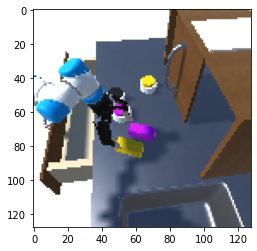

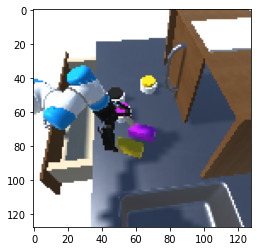

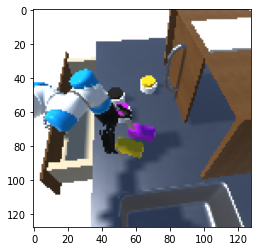

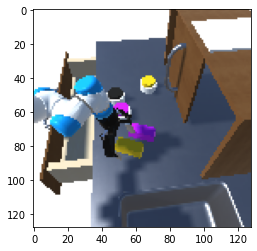

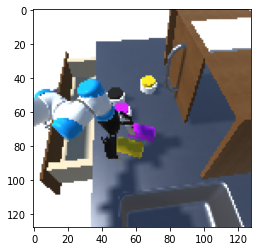

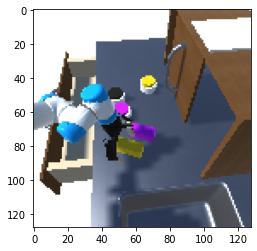

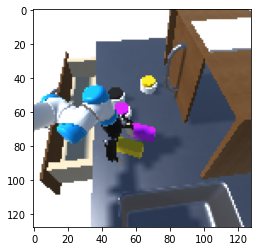

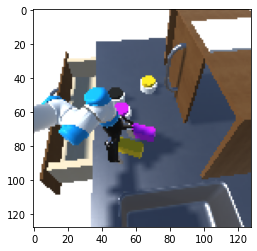

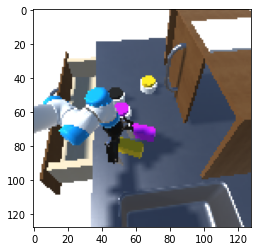

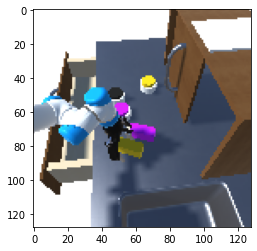

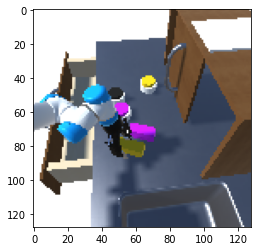

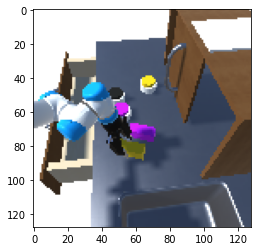

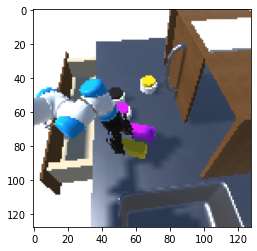

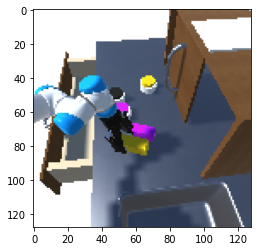

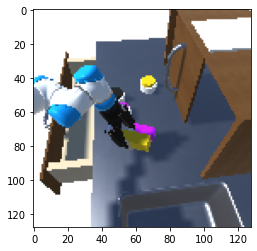

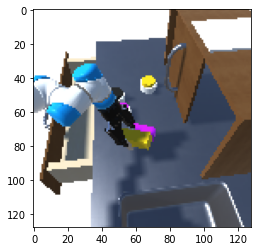

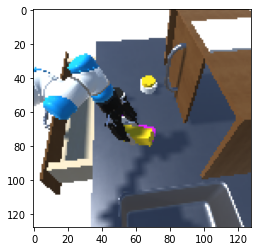

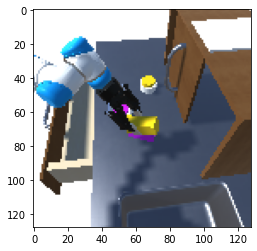

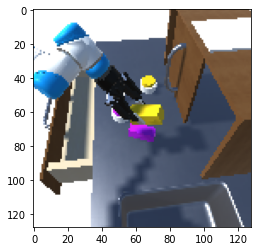

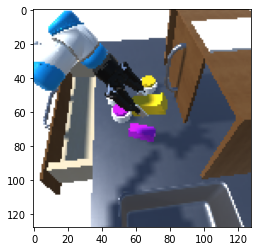

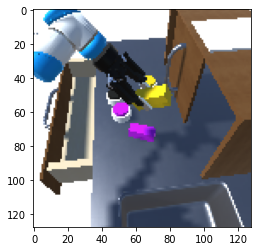

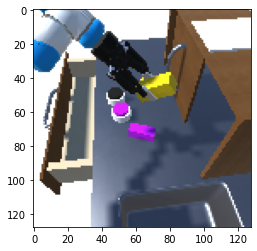

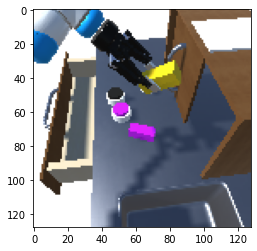

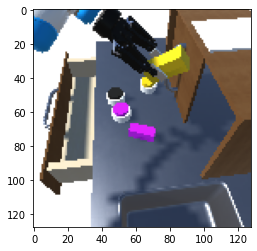

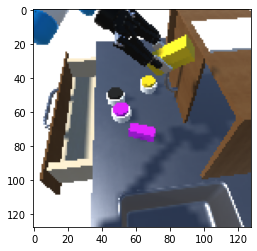

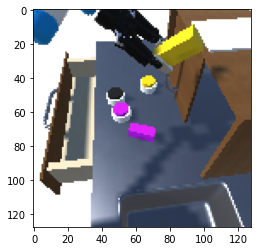

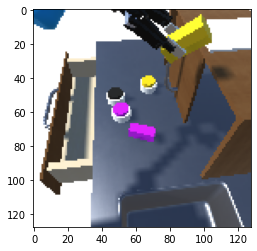

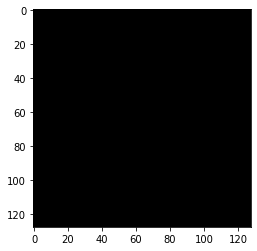

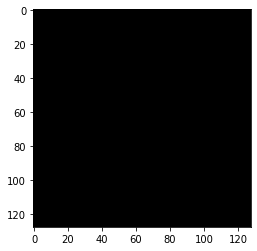

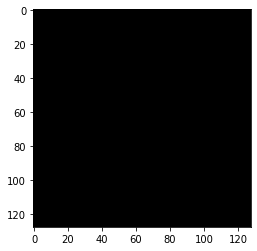

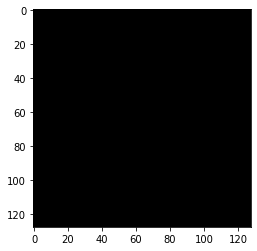

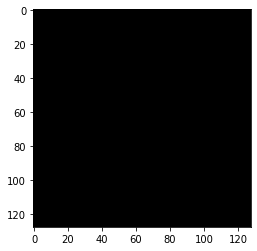

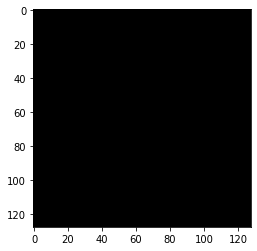

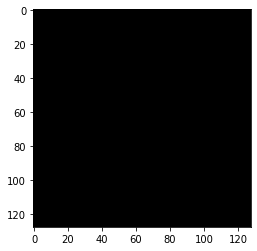

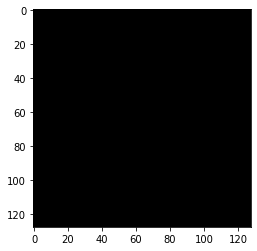

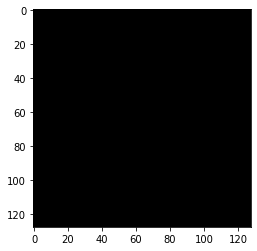

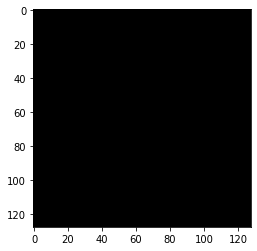

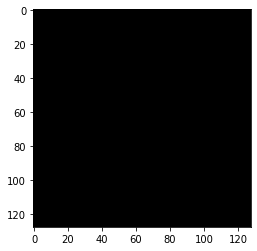

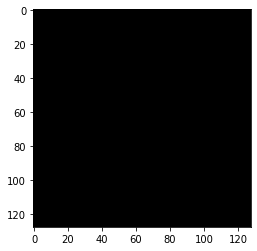

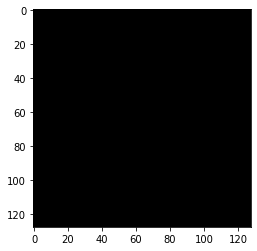

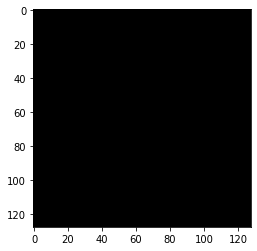

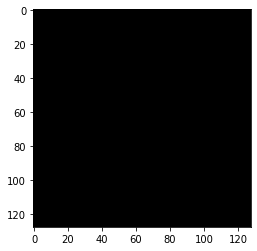

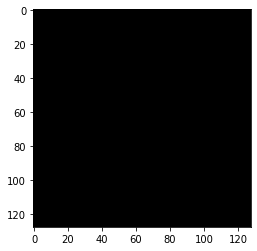

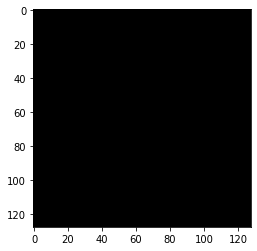

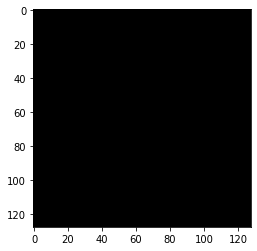

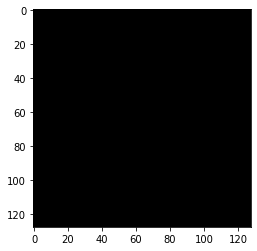

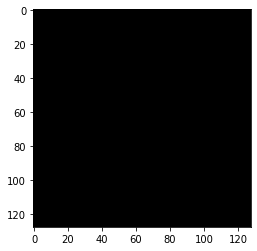

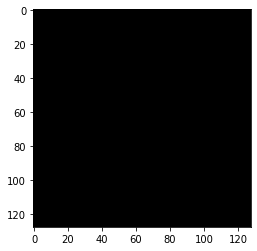

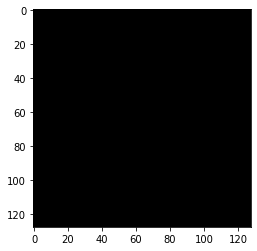

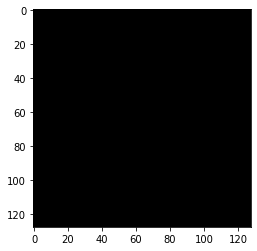

In [33]:
print(t['labels'])
for i in range(0, len(t['imgs'])):
    plt.imshow(t['imgs'][i,:,:,:])
    plt.show()

'lift the yellow block up'

NameError: name 'Path' is not defined

In [3]:

from pathlib import Path

In [4]:
Path.cwd()

PosixPath('/catkin_ws/src/robotics/learning_from_play/notebooks')